In [1]:
import pandas as pd
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt


In [2]:
from scipy.stats import ttest_rel
from itertools import combinations
import statsmodels.stats.multitest as smm
from scipy.stats import f_oneway

In [3]:
# Assume the notebook is in the project root or a subfolder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mimic_emb_path = os.path.abspath(os.path.join(os.getcwd(), "..", "MIMIC_CXR_EMB"))

sys.path.append(project_root)
sys.path.append(mimic_emb_path)

from MIMIC_CXR_EMB.config_MIMIC import get_diseases, get_diseases_abbr

In [4]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [5]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [6]:
seed_19_sex = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,diseases,%M,Gap_M,%F,Gap_F
0,Enlarged Cardiomediastinum,0.609665,0.092378,0.390335,-0.092378
1,Cardiomegaly,0.608244,0.066602,0.391756,-0.066602
2,Lung Opacity,0.592607,-0.031344,0.407393,0.031344
3,Lung Lesion,0.553452,0.038606,0.446548,-0.038606
4,Edema,0.565633,0.010055,0.434367,-0.010055


In [7]:
seed_19_age = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,diseases,%60-80,Gap_60-80,%40-60,Gap_40-60,%20-40,Gap_20-40,%80+,Gap_80+,%0-20,Gap_0-20
0,Enlarged Cardiomediastinum,0.403346,-0.003687,0.288104,0.003687,0.128253,0.083070,0,NaN,0.010223,-0.108630
1,Cardiomegaly,0.400297,-0.003016,0.246565,0.003016,0.111771,-0.034254,0,NaN,0.005199,0.095314
2,Lung Opacity,0.407111,0.070696,0.289608,0.032861,0.107507,-0.032861,0,NaN,0.007922,-0.049402
3,Lung Lesion,0.420935,0.166639,0.265033,0.059419,0.133630,-0.059419,0,NaN,0.001114,-0.201085
4,Edema,0.423268,0.075214,0.269422,0.013373,0.081515,-0.013373,0,NaN,0.007271,-0.018438


In [8]:
seed_19_race = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

FileNotFoundError: [Errno 2] No such file or directory: './TPR_GAPS/Run_seed19_TPR_GAP_race.csv'

In [9]:
diseases=get_diseases()

diseases = [disease for disease in diseases if disease != 'No Finding']

diseases_abbr =get_diseases_abbr()


## 1. Gender

In [10]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)

In [11]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [12]:
sex_df_male_mean = result_sex_grouped_Stat['%M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['%F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [13]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [14]:
for disease in diseases:
  
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "%F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [15]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
4,Edema,Edema,0.000260,0.565633,-0.000130,0.010396,0.434367,0.000130,0.010396
6,Pneumonia,Pneumonia,0.004108,0.581699,0.002054,0.008253,0.418301,-0.002054,0.008253
11,Fracture,Fracture,0.013211,0.710805,-0.006605,0.016216,0.289195,0.006605,0.016216
12,Support Devices,Sup. Devices,0.014883,0.592547,-0.007442,0.005449,0.407453,0.007442,0.005449
7,Atelectasis,Atelectasis,0.027000,0.599397,0.013500,0.014910,0.400603,-0.013500,0.014910
2,Lung Opacity,Air. Opacity,0.042445,0.592607,-0.021222,0.005922,0.407393,0.021222,0.005922
3,Lung Lesion,Lung Lesion,0.047182,0.553452,0.023591,0.018480,0.446548,-0.023591,0.018480
9,Pleural Effusion,Effusion,0.054461,0.583002,-0.027230,0.010839,0.416998,0.027230,0.010839
8,Pneumothorax,Pneumothorax,0.064294,0.647822,0.032147,0.018360,0.352178,-0.032147,0.018360
10,Pleural Other,Pleural Other,0.091954,0.721154,0.045977,0.026794,0.278846,-0.045977,0.026794


In [16]:
sex_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%M', 'Gap_M_mean', 'CI_M',
       '%F', 'Gap_F_mean', 'CI_F'],
      dtype='object')

In [17]:

# Extract just the Gap columns in the right order
gap_cols = ['Gap_M_mean', 'Gap_F_mean']

ci_cols = [
    'CI_0-20', 'CI_20-40', 'CI_40-60',
    'CI_60-80', 'CI_80-'
]

gap_df = sex_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")


Gap_M_mean vs Gap_F_mean: t=0.8203, p=0.4281, corrected_p=0.4281, significant=False


In [18]:
sex_tpr_disp_df.to_csv("./TPR_GAPS/sex_tpr_disp.csv")

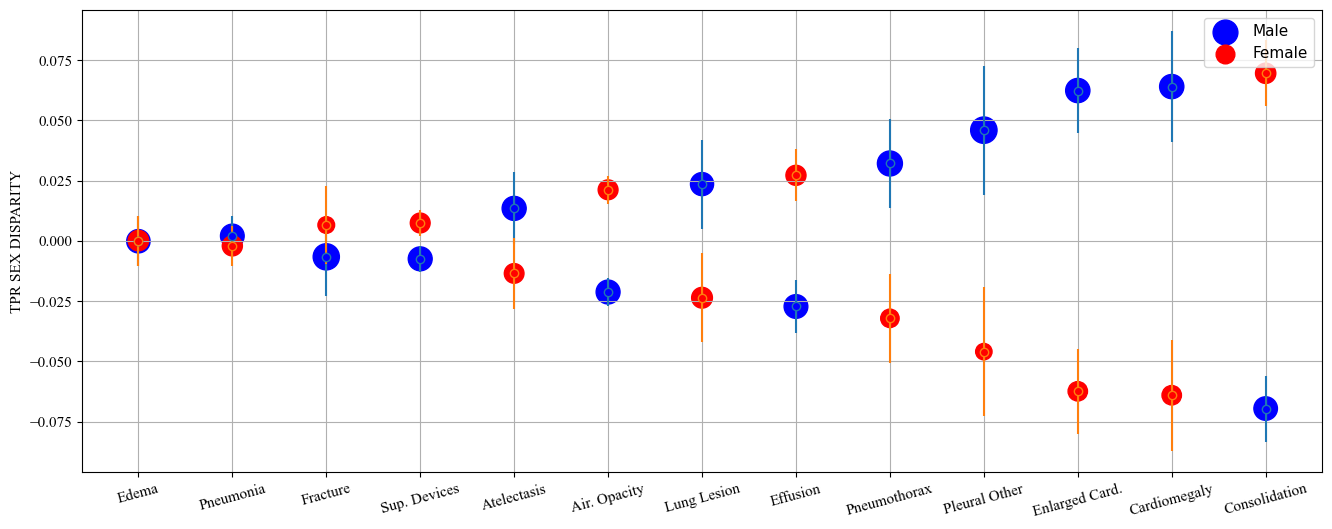

In [19]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],500), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],500), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_SEX.pdf")


## 2. Age

In [20]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [21]:
age_df_40_mean = result_age_grouped_stat['%40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [22]:
age_df_60_mean = result_age_grouped_stat['%60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [23]:
age_df_20_mean = result_age_grouped_stat['%20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [24]:
age_df_80_mean = result_age_grouped_stat['%80+']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80+']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80+']["std"]/np.sqrt(number_of_runs)

In [25]:
age_df_0_mean = result_age_grouped_stat['%0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [26]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [27]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [28]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [29]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "%60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "%20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "%80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "%0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [30]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv("./TPR_GAPS/age_tpr_disp.csv")

In [31]:
age_tpr_disp_df

,diseases,diseases_abbr,Distance,%40-60,Gap_40-60_mean,CI_40-60,%60-80,Gap_60-80_mean,CI_60-80,%20-40,Gap_20-40_mean,CI_20-40,%80-,Gap_80-_mean,CI_80-,%0-20,Gap_0-20_mean,CI_0-20
12,Support Devices,Sup. Devices,0.067447,0.323390,-0.003158,0.001351,0.398968,-0.025139,0.001814,0.130948,0.003158,0.001351,0.0,NaN,NaN,0.010322,0.042307,0.013001
4,Edema,Edema,0.083954,0.269422,0.007889,0.007460,0.423268,0.058941,0.011360,0.081515,-0.021010,0.010974,0.0,NaN,NaN,0.007271,-0.025013,0.026927
8,Pneumothorax,Pneumothorax,0.087084,0.288900,-0.040706,0.023234,0.418050,-0.021568,0.012515,0.185166,0.046379,0.015493,0.0,NaN,NaN,0.015560,0.029516,0.024046
2,Lung Opacity,Air. Opacity,0.103663,0.289608,0.022861,0.006291,0.407111,0.061905,0.009626,0.107507,-0.023638,0.005386,0.0,NaN,NaN,0.007922,-0.041759,0.016898
1,Cardiomegaly,Cardiomegaly,0.133223,0.246565,0.008235,0.004269,0.400297,-0.009504,0.006258,0.111771,-0.027698,0.013360,0.0,NaN,NaN,0.005199,0.105524,0.033716
9,Pleural Effusion,Effusion,0.141282,0.297969,0.030399,0.005575,0.419607,0.038947,0.006597,0.092590,-0.030399,0.005575,0.0,NaN,NaN,0.007262,-0.102336,0.027997
0,Enlarged Cardiomediastinum,Enlarged Card.,0.203557,0.288104,0.010116,0.011662,0.403346,-0.003617,0.005895,0.128253,0.053145,0.030812,0.0,NaN,NaN,0.010223,-0.150412,0.029853
7,Atelectasis,Atelectasis,0.248664,0.327300,0.054040,0.013743,0.420814,0.021147,0.019126,0.084163,-0.021147,0.019126,0.0,NaN,NaN,0.008145,-0.194624,0.054296
6,Pneumonia,Pneumonia,0.306530,0.281046,-0.111094,0.024764,0.372549,-0.052608,0.026858,0.120915,0.052608,0.026858,0.0,NaN,NaN,0.021242,0.195435,0.091559
3,Lung Lesion,Lung Lesion,0.323280,0.265033,0.052682,0.012345,0.420935,0.132265,0.019598,0.133630,-0.052682,0.012345,0.0,NaN,NaN,0.001114,-0.191015,0.021645


In [32]:

# Define your columns
gap_cols = [
    'Gap_0-20_mean', 'Gap_20-40_mean', 'Gap_40-60_mean',
    'Gap_60-80_mean'
]

# Assuming 'age_tpr_disp_df' is your DataFrame
gap_df = age_tpr_disp_df[gap_cols]

# Prepare pairwise combinations
pairs = list(combinations(gap_cols, 2))
tstats = []
pvals = []

# Perform paired t-tests
for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Correct for multiple comparisons (Bonferroni)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Build a results DataFrame
results_df = pd.DataFrame({
    'Comparison': [f"{a} vs {b}" for a, b in pairs],
    't-statistic': tstats,
    'Raw p-value': pvals,
    'Corrected p-value': pvals_corrected,
    'Significant (Bonferroni)': reject
})

# Round for presentation
significance_age_df = results_df.round({
    't-statistic': 3,
    'Raw p-value': 3,
    'Corrected p-value': 3
})


ANOVA result: F-statistic = 0.0651, p-value = 0.9781 significant=False


In [34]:

df = age_tpr_disp_df

# Define the columns to use
gap_cols = [
    'Gap_0-20_mean',
    'Gap_20-40_mean',
    'Gap_40-60_mean',
    'Gap_60-80_mean']

# Drop rows with missing values in those columns
gap_df = df[gap_cols].dropna()

# Extract values into 4 separate lists (one per group)
group_0_20 = gap_df['Gap_0-20_mean'].tolist()
group_20_40 = gap_df['Gap_20-40_mean'].tolist()
group_40_60 = gap_df['Gap_40-60_mean'].tolist()
group_60_80 = gap_df['Gap_60-80_mean'].tolist()

# Perform one-way ANOVA across the groups
f_stat, p_val = f_oneway(group_0_20, group_20_40, group_40_60, group_60_80)

# Show results

print(f"ANOVA result: F-statistic = {f_stat:.3f}, p-value = {p_val:.3f} significant={p_val < 0.05}")


ANOVA result: F-statistic = 0.065, p-value = 0.978 significant=False


In [ ]:
significance_age_df

,Comparison,t-statistic,Raw p-value,Corrected p-value,Significant (Bonferroni)
0,Gap_0-20_mean vs Gap_20-40_mean,-0.142,0.889,1.0,False
1,Gap_0-20_mean vs Gap_40-60_mean,0.138,0.893,1.0,False
2,Gap_0-20_mean vs Gap_60-80_mean,0.115,0.910,1.0,False
3,Gap_20-40_mean vs Gap_40-60_mean,0.463,0.651,1.0,False
4,Gap_20-40_mean vs Gap_60-80_mean,0.500,0.626,1.0,False
5,Gap_40-60_mean vs Gap_60-80_mean,-0.002,0.998,1.0,False


In [ ]:
plt.rcParams.update({'font.size': font_size})

In [ ]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],500), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],500), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],500), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],500), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],500), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_AGE.pdf")

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

Error in callback <function _draw_all_if_interactive at 0x00000226930451B0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True,  True,
                    True,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1600x600 with 1 Axes>

## 3. Race

In [ ]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [ ]:
result_race_grouped_stat

%White                                              \
                            count      mean           std       min       25%   
diseases                                                                        
Atelectasis                   5.0  0.545736  0.000000e+00  0.545736  0.545736   
Cardiomegaly                  5.0  0.529497  0.000000e+00  0.529497  0.529497   
Consolidation                 5.0  0.578466  0.000000e+00  0.578466  0.578466   
Edema                         5.0  0.614225  0.000000e+00  0.614225  0.614225   
Enlarged Cardiomediastinum    5.0  0.584127  0.000000e+00  0.584127  0.584127   
Fracture                      5.0  0.490476  0.000000e+00  0.490476  0.490476   
Lung Lesion                   5.0  0.452919  0.000000e+00  0.452919  0.452919   
Lung Opacity                  5.0  0.543407  0.000000e+00  0.543407  0.543407   
No Finding                    5.0  0.369470  0.000000e+00  0.369470  0.369470   
Pleural Effusion              5.0  0.604667  0.000000e+00  0.604667  0.604667   
Pleural Other                 5.0  0.671053  0.000000e+00  0.671053  0.671053   
Pneumonia                     5.0  0.493418  0.000000e+00  0.493418  0.493418   
Pneumothorax                  5.0  0.447441  6.206335e-17  0.447441  0.447441   
Support Devices               5.0  0.551733  0.000000e+00  0.551733  0.551733   

                                                         Gap_White            \
                                 50%       75%       max     count      mean   
diseases                                                                       
Atelectasis                 0.545736  0.545736  0.545736       5.0  0.007113   
Cardiomegaly                0.529497  0.529497  0.529497       5.0 -0.050629   
Consolidation               0.578466  0.578466  0.578466       5.0  0.015624   
Edema                       0.614225  0.614225  0.614225       5.0 -0.009075   
Enlarged Cardiomediastinum  0.584127  0.584127  0.584127       5.0  0.004655   
Fracture                    0.490476  0.490476  0.490476       5.0  0.078995   
Lung Lesion                 0.452919  0.452919  0.452919       5.0 -0.003346   
Lung Opacity                0.543407  0.543407  0.543407       5.0  0.050304   
No Finding                  0.369470  0.369470  0.369470       5.0 -0.067553   
Pleural Effusion            0.604667  0.604667  0.604667       5.0  0.062474   
Pleural Other               0.671053  0.671053  0.671053       5.0  0.084314   
Pneumonia                   0.493418  0.493418  0.493418       5.0  0.012293   
Pneumothorax                0.447441  0.447441  0.447441       5.0  0.056198   
Support Devices             0.551733  0.551733  0.551733       5.0 -0.021474   

                            ... %American           Gap_American            \
                            ...       75%       max        count      mean   
diseases                    ...                                              
Atelectasis                 ...  0.003418  0.003418          5.0  0.073561   
Cardiomegaly                ...  0.002733  0.002733          5.0  0.097808   
Consolidation               ...  0.000000  0.000000          0.0       NaN   
Edema                       ...  0.003129  0.003129          5.0  0.147336   
Enlarged Cardiomediastinum  ...  0.000000  0.000000          0.0       NaN   
Fracture                    ...  0.001190  0.001190          5.0 -0.071490   
Lung Lesion                 ...  0.000000  0.000000          0.0       NaN   
Lung Opacity                ...  0.001502  0.001502          5.0 -0.350486   
No Finding                  ...  0.000935  0.000935          5.0 -0.060319   
Pleural Effusion            ...  0.003074  0.003074          5.0  0.142460   
Pleural Other               ...  0.000000  0.000000          0.0       NaN   
Pneumonia                   ...  0.000798  0.000798          5.0 -0.357634   
Pneumothorax                ...  0.000000  0.000000          0.0       NaN   
Support Devices             ...  0.00077

In [ ]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [ ]:
race_df_white_mean = result_race_grouped_stat['%White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [ ]:
race_df_black_mean = result_race_grouped_stat['%Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [ ]:
race_df_hisp_mean = result_race_grouped_stat['%Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [ ]:
race_df_other_mean = result_race_grouped_stat['%Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [ ]:
race_df_asian_mean = result_race_grouped_stat['%Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [ ]:
race_df_american_mean = result_race_grouped_stat['%American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [ ]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [ ]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [ ]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "%Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "%Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "%Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "%Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "%American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv("./TPR_GAPS/race_tpr_disp.csv")

In [ ]:
race_tpr_disp_df.columns

Index(['diseases', 'diseases_abbr', 'Distance', '%White', 'Gap_W_mean', 'CI_W',
       '%Black', 'Gap_B_mean', 'CI_B', '%Hisp', 'Gap_H_mean', 'CI_H', '%Other',
       'Gap_Ot_mean', 'CI_Ot', '%Asian', 'Gap_As_mean', 'CI_As', '%American',
       'Gap_Am_mean', 'CI_Am'],
      dtype='object')

In [ ]:

# Extract just the Gap columns in the right order
gap_cols = [
    'Gap_W_mean', 'Gap_B_mean', 'Gap_H_mean',
    'Gap_Ot_mean', 'Gap_As_mean','Gap_Am_mean'
]

ci_cols = [
    'CI_0-20', 'CI_20-40', 'CI_40-60',
    'CI_60-80', 'CI_80-'
]

gap_df = race_tpr_disp_df[gap_cols]


# Store results
pairs = list(combinations(gap_cols, 2))
pvals = []
tstats = []

for a, b in pairs:
    t_stat, p_val = ttest_rel(gap_df[a], gap_df[b], nan_policy='omit')
    tstats.append(t_stat)
    pvals.append(p_val)

# Multiple comparisons correction (e.g., Bonferroni or FDR)
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method='bonferroni')

# Report
for i, (a, b) in enumerate(pairs):
    print(f"{a} vs {b}: t={tstats[i]:.4f}, p={pvals[i]:.4f}, corrected_p={pvals_corrected[i]:.4f}, significant={reject[i]}")


Gap_W_mean vs Gap_B_mean: t=2.0957, p=0.0580, corrected_p=0.8697, significant=False
Gap_W_mean vs Gap_H_mean: t=1.6720, p=0.1204, corrected_p=1.0000, significant=False
Gap_W_mean vs Gap_Ot_mean: t=1.0030, p=0.3356, corrected_p=1.0000, significant=False
Gap_W_mean vs Gap_As_mean: t=0.0664, p=0.9481, corrected_p=1.0000, significant=False
Gap_W_mean vs Gap_Am_mean: t=0.3893, p=0.7086, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_H_mean: t=0.5880, p=0.5674, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_Ot_mean: t=-0.0573, p=0.9553, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_As_mean: t=-1.1684, p=0.2653, corrected_p=1.0000, significant=False
Gap_B_mean vs Gap_Am_mean: t=-0.0409, p=0.9685, corrected_p=1.0000, significant=False
Gap_H_mean vs Gap_Ot_mean: t=-0.4760, p=0.6426, corrected_p=1.0000, significant=False
Gap_H_mean vs Gap_As_mean: t=-1.2144, p=0.2479, corrected_p=1.0000, significant=False
Gap_H_mean vs Gap_Am_mean: t=0.2122, p=0.8380, corrected_p=1.00

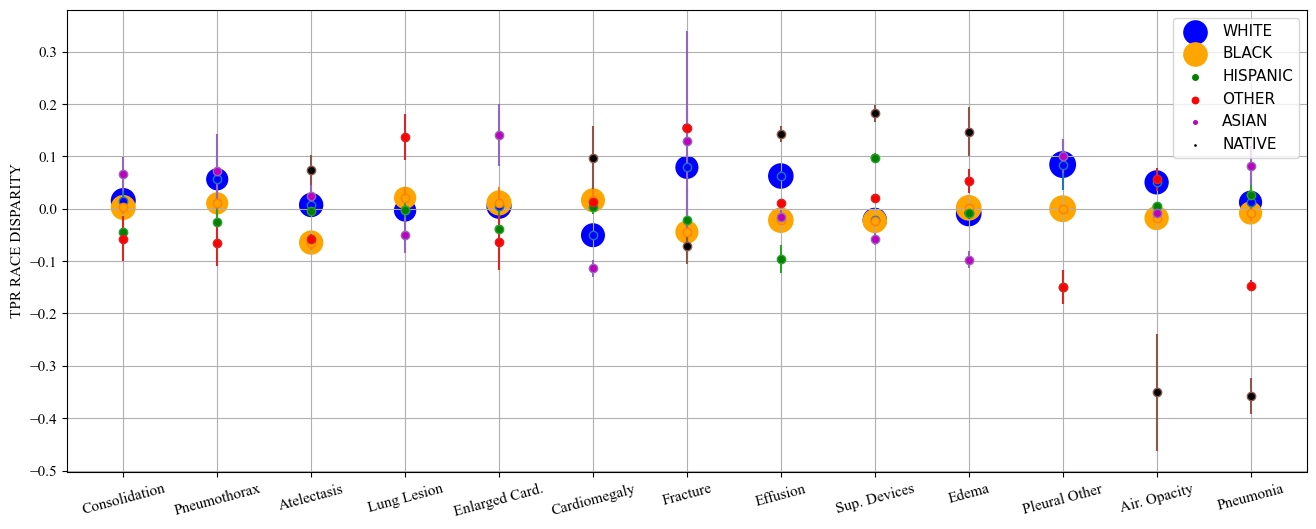

In [ ]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['%White'],500), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['%Black'],500), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['%Hisp'],500), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['%Other'],500), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['%Asian'],500), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['%American'],500), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_RACE.pdf")